<a href="https://colab.research.google.com/github/Allen123321/DEMO-DL/blob/master/%E6%A1%88%E4%BE%8B%E4%B8%80%EF%BC%9AEM%E5%88%86%E7%B1%BB%E5%88%9D%E8%AF%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
%matplotlib inline
from scipy.stats import multivariate_normal
from sklearn.mixture import GaussianMixture
from sklearn.metrics import pairwise_distances_argmin


In [17]:
'''
sklearn.mixture.GaussianMixture在0.18版本以前是sklearn.mixture.GMM，两者的参数基本类型，这里主要介绍GaussianMixture的相关参数
属性参数：
n_components：混合组合的个数，默认为1, 可以理解为聚类/分类数量
covariance_type：给定协方差的类型，可选: full、tied、diag、spherical，默认为full；
    full：每个组件都有自己的公用的协防差矩阵，tied：所有组件公用一个协方差矩阵，
    diag：每个组件都有自己的斜对角协方差矩阵，spherical：每个组件都有自己单独的方差值
tol：默认1e-3，收敛阈值，如果在迭代过程中，平均增益小于该值的时候，EM算法结束。
reg_covar：协方差对角线上的非负正则化参数，默认为0
max_iter：em算法的最大迭代次数，默认100
n_init: 默认值1，执行初始化操作数量，该参数最好不要变动
init_params：初始化权重值、均值以及精度的方法，参数可选：kmeans、random，默认kmeans；kmeans：使用kmeans算法进行初始化操作
weights_init：初始化权重列表，如果没有给定，那么使用init_params参数给定的方法来进行创建，默认为None
means_init：初始化均值列表，如果没有给定，那么使用init_params参数给定的方法来进行创建，默认为None
precisions_init: 初始化精度列表，如果没有给定，那么使用init_params参数给定的方法来进行创建，默认为None
warn_stat：默认为False，当该值为true的时候，在类似问题被多次训练的时候，可以加快收敛速度
'''
## 使用scikit携带的EM算法或者自己实现的EM算法
def trainModel(style, x):
    if style == 'sklearn':
        # 对象创建
        g = GaussianMixture(n_components=2, covariance_type='full', tol=1e-6, max_iter=1000, init_params='kmeans')
        # 模型训练
        g.fit(x)
        # 效果输出
        print ('类别概率:\t', g.weights_[0])
        print ('均值:\n', g.means_, '\n')
        print ('方差:\n', g.covariances_, '\n')
        mu1, mu2 = g.means_
        sigma1, sigma2 = g.covariances_
        # 返回数据
        return (mu1, mu2, sigma1, sigma2)
    else:
        ## 自己实现一个EM算法
        num_iter = 100
        n, d = data.shape
        
        # 初始化均值和方差正定矩阵
        mu1 = data.min(axis=0)
        mu2 = data.max(axis=0)
        sigma1 = np.identity(d)
        sigma2 = np.identity(d)
        pi = 0.5
        
        # 实现EM算法
        for i in range(num_iter):
            # E Step
            norm1 = multivariate_normal(mu1, sigma1)
            norm2 = multivariate_normal(mu2, sigma2)
            tau1 = pi * norm1.pdf(data)
            tau2 = (1 - pi) * norm2.pdf(data)
            gamma = tau1 / (tau1 + tau2)
            
            # M Step
            mu1 = np.dot(gamma, data) / np.sum(gamma)
            mu2 = np.dot((1 - gamma), data) / np.sum((1 - gamma))
            sigma1 = np.dot(gamma * (data - mu1).T, data - mu1) / np.sum(gamma)
            sigma2 = np.dot((1 - gamma) * (data - mu2).T, data - mu2) / np.sum(1 - gamma)
            pi = np.sum(gamma) / n
            
            # 输出信息
            j = i + 1
            if j % 10 == 0:
                print (j, ":\t", mu1, mu2)
        
        # 效果输出
        print ('类别概率:\t', pi)
        print ('均值:\t', mu1, mu2)
        print ('方差:\n', sigma1, '\n\n', sigma2, '\n')
        
        # 返回结果
        return (mu1, mu2, sigma1, sigma2)

In [18]:
# 创建模拟数据（3维数据）
np.random.seed(28)
N = 500
M = 250

## 根据给定的均值和协方差矩阵构建数据
mean1 = (0, 0, 0)
cov1 = np.diag((1, 2, 3))
## 产生400条数据
data1 = np.random.multivariate_normal(mean1, cov1, N)

## 产生一个数据分布不均衡的数据集， 100条
mean2 = (2, 2, 1)
cov2 = np.array(((1, 1, 3), (1, 2, 1), (0, 0, 1)))
data2 = np.random.multivariate_normal(mean2, cov2, M)

## 合并data1和data2这两个数据集
data = np.vstack((data1, data2))

## 产生数据对应的y值
y1 = np.array([True] * N + [False] * M)
y2 = ~y1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: covariance is not positive-semidefinite.
  from ipykernel import kernelapp as app


In [19]:
## 预测结果(得到概率密度值)
style = 'sklearn'
style = 'self'
mu1, mu2, sigma1, sigma2 = trainModel(style, data)
# 预测分类（根据均值和方差对原始数据进行概率密度的推测）
norm1 = multivariate_normal(mu1, sigma1)
norm2 = multivariate_normal(mu2, sigma2)
tau1 = norm1.pdf(data)
tau2 = norm2.pdf(data)

10 :	 [ 0.07675269 -0.01686764 -0.01737712] [2.04021233 2.1175765  0.8898225 ]
20 :	 [ 0.05457846 -0.01657497  0.01556185] [1.99881444 2.024444   0.78550548]
30 :	 [ 0.0493724  -0.01530053  0.01998181] [1.98194848 1.99372062 0.76630687]
40 :	 [ 0.04769738 -0.0146461   0.02114908] [1.97617151 1.98312041 0.7605966 ]
50 :	 [ 0.04713832 -0.0144041   0.02151916] [1.97421785 1.97952545 0.75872926]
60 :	 [ 0.04695101 -0.01432056  0.0216412 ] [1.97356084 1.9783154  0.75810762]
70 :	 [ 0.04688822 -0.01429228  0.02168189] [1.97334033 1.97790917 0.75789968]
80 :	 [ 0.04686717 -0.01428277  0.02169551] [1.97326637 1.9777729  0.75783001]
90 :	 [ 0.04686011 -0.01427957  0.02170007] [1.97324158 1.97772721 0.75780666]
100 :	 [ 0.04685774 -0.0142785   0.0217016 ] [1.97323326 1.97771189 0.75779883]
类别概率:	 0.6564778031794392
均值:	 [ 0.04685774 -0.0142785   0.0217016 ] [1.97323326 1.97771189 0.75779883]
方差:
 [[ 1.01791148  0.0450431  -0.10519131]
 [ 0.0450431   2.16506287  0.02188142]
 [-0.10519131  0.02188

In [20]:
## 计算均值的距离，然后根据距离得到分类情况
dist = pairwise_distances_argmin([mean1, mean2], [mu1, mu2], metric='euclidean')
print ("距离:", dist)
if dist[0] == 0:
    c1 = tau1 > tau2
else:
    c1 = tau1 < tau2
c2 = ~c1

## 计算准率
acc = np.mean(y1 == c1)
print (u'准确率：%.2f%%' % (100*acc))

距离: [0 1]
准确率：88.53%


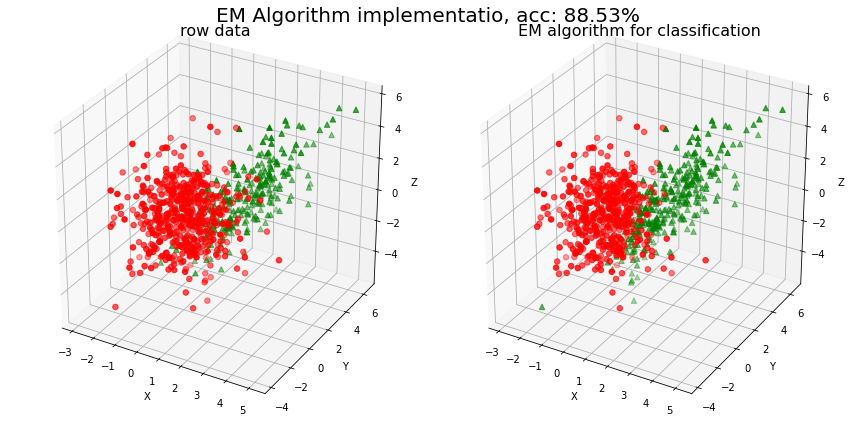

In [24]:
## 画图
fig = plt.figure(figsize=(12, 6),facecolor='w')

## 添加一个子图，设置为3d的
ax = fig.add_subplot(121, projection='3d')
## 点图
ax.scatter(data[y1, 0], data[y1, 1], data[y1, 2], c='r', s=30, marker='o', depthshade=True)
ax.scatter(data[y2, 0], data[y2, 1], data[y2, 2], c='g', s=30, marker='^', depthshade=True)
## 标签
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
## 标题
ax.set_title(u'row data', fontsize=16)

## 添加一个子图，设置为3d
ax = fig.add_subplot(122, projection='3d')
# 画点
ax.scatter(data[c1, 0], data[c1, 1], data[c1, 2], c='r', s=30, marker='o', depthshade=True)
ax.scatter(data[c2, 0], data[c2, 1], data[c2, 2], c='g', s=30, marker='^', depthshade=True)
# 设置标签
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
# 设置标题
ax.set_title(u'EM algorithm for classification ', fontsize=16)

# 设置总标题
plt.suptitle(u'EM Algorithm implementatio, acc: %.2f%%' % (acc * 100), fontsize=20)
plt.subplots_adjust(top=0.90)
plt.tight_layout()
plt.show()